# Classificaço de Patologias usando Imagens Médicas


## Carregar imagens do diretório

In [1]:
import os
current_dir = os.path.abspath(os.getcwd())

## Converter base de dados para treino, validação e teste

In [2]:
#cria nova pasta para cachorros e gatos atendendo a estrutura do Keras/Tensorflow
folder = "/novo"
train_folder = current_dir + folder + "/train"
#val_folder = current_dir + folder + "/val"
test_folder = current_dir + folder + "/test"

# Fazer o Tensorflow carregar as imagens para a RNA

In [3]:
import tensorflow as tf

print(tf.config.list_physical_devices('GPU'))
print(tf.__version__)

2022-06-27 20:33:38.134848: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-27 20:33:38.134872: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


[]
2.6.1


2022-06-27 20:33:47.536036: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-27 20:33:47.536103: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-27 20:33:47.536149: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pc): /proc/driver/nvidia/version does not exist


In [4]:
from tensorflow.keras.utils import image_dataset_from_directory
#image_dataset_from_directory monta uma estrutura de dados com imagens 180x180 ajustando o peso da rede neural
# de 32 em 32 imagens
train_dataset = image_dataset_from_directory(train_folder,
                                             image_size=(180, 180),
                                             batch_size=32)

#validation_dataset = image_dataset_from_directory(val_folder,
                                                  #image_size=(180, 180),
                                                  #batch_size=32)

test_dataset = image_dataset_from_directory(test_folder,
                                            image_size=(180, 180),
                                            batch_size=32)

Found 34931 files belonging to 2 classes.
Found 484 files belonging to 2 classes.


2022-06-27 20:33:49.402272: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
#
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    print(data_batch[0].shape)
    break

2022-06-27 20:33:49.566476: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)
(180, 180, 3)


# Treinando o modelo

In [6]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

#cria uma arquitetura de uma rede neural profunda vazia
model = keras.Sequential()
#model.add(Rescaling(scale=1.0/255))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(180,180,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
#model.add(Dense(4, activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [
    ModelCheckpoint(
        filepath="classificacao16.keras",
        save_best_only=True,
        monitor="loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=100,
    #validation_data=validation_dataset,
    callbacks=callbacks)



Epoch 1/100
1092/1092 [==============================] - 332s 303ms/step - loss: 2.6374 - accuracy: 0.7511
Epoch 2/100
1092/1092 [==============================] - 324s 296ms/step - loss: 0.3514 - accuracy: 0.8476
Epoch 3/100
1092/1092 [==============================] - 323s 296ms/step - loss: 0.3081 - accuracy: 0.8801
Epoch 4/100
1092/1092 [==============================] - 323s 295ms/step - loss: 0.2716 - accuracy: 0.8957
Epoch 5/100
1092/1092 [==============================] - 322s 295ms/step - loss: 0.2362 - accuracy: 0.9115
Epoch 6/100
1092/1092 [==============================] - 321s 294ms/step - loss: 0.2226 - accuracy: 0.9184
Epoch 7/100
1092/1092 [==============================] - 319s 292ms/step - loss: 0.1940 - accuracy: 0.9284
Epoch 8/100
1092/1092 [==============================] - 317s 290ms/step - loss: 0.1780 - accuracy: 0.9364
Epoch 9/100
1092/1092 [==============================] - 316s 289ms/step - loss: 0.1499 - accuracy: 0.9476
Epoch 10/100
1092/1092 [=============

1092/1092 [==============================] - 312s 286ms/step - loss: 0.0453 - accuracy: 0.9971
Epoch 77/100
1092/1092 [==============================] - 314s 287ms/step - loss: 0.0392 - accuracy: 0.9970
Epoch 78/100
1092/1092 [==============================] - 314s 288ms/step - loss: 0.0226 - accuracy: 0.9983
Epoch 79/100
1092/1092 [==============================] - 314s 288ms/step - loss: 0.0472 - accuracy: 0.9971
Epoch 80/100
1092/1092 [==============================] - 313s 287ms/step - loss: 0.0565 - accuracy: 0.9965
Epoch 81/100
1092/1092 [==============================] - 313s 287ms/step - loss: 0.0457 - accuracy: 0.9961
Epoch 82/100
1092/1092 [==============================] - 314s 287ms/step - loss: 0.0339 - accuracy: 0.9975
Epoch 83/100
1092/1092 [==============================] - 313s 287ms/step - loss: 0.0592 - accuracy: 0.9962
Epoch 84/100
1092/1092 [==============================] - 314s 288ms/step - loss: 0.0437 - accuracy: 0.9967
Epoch 85/100
1092/1092 [=================

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 484416)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 484417    
Total params: 503,809
Trainable params: 503,809
Non-trainable params: 0
_________________________________________________________________


In [9]:
#https://www.tensorflow.org/js/tutorials/conversion/import_keras?hl=pt-br#alternative_use_the_python_api_to_export_directly_to_tfjs_layers_format
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, "conversao_01_16")

# Visualização de Resultados

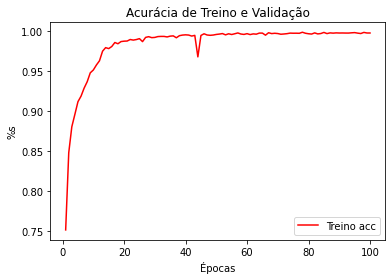

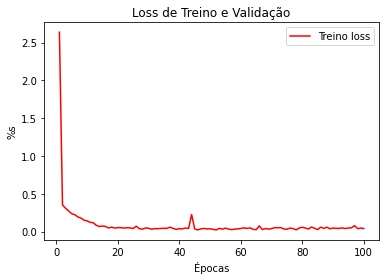

In [10]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
#val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
#val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Treino acc")
#plt.plot(epochs, val_accuracy, "b", label="Val acc")
plt.xlabel("Épocas")
plt.ylabel("%s")
plt.title("Acurácia de Treino e Validação")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Treino loss")
#plt.plot(epochs, val_loss, "b", label="Val loss")
plt.xlabel("Épocas")
plt.ylabel("%s")
plt.title("Loss de Treino e Validação")
plt.legend()
plt.show()

# Resultados do Conjunto de Teste

In [11]:
#from tensorflow import keras
#model = keras.models.load_model("classificacao01.keras")
# serialize model to JSON
#model_json = model.to_json()
#with open("classificacao01.json", "w") as json_file:json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("classificacao01.h5")
#print("Saved model to disk")

In [12]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 1s 57ms/step - loss: 0.9463 - accuracy: 0.9835
Test accuracy: 0.983


# Referências

* https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/
* https://stackoverflow.com/questions/3430372/how-do-i-get-the-full-path-of-the-current-files-directory
* https://www.geeksforgeeks.org/python-list-files-in-a-directory/
* https://pynative.com/python-random-sample/
* https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/
* https://www.mygreatlearning.com/blog/keras-tutorial/
* https://www.machinecurve.com/index.php/2020/03/30/how-to-use-conv2d-with-keras/
* https://www.pyimagesearch.com/2021/06/30/how-to-use-the-modelcheckpoint-callback-with-keras-and-tensorflow/